# Drier
## 1. 데이터 확인

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./data/drying_actuator1.csv')
df2 = pd.read_csv('./data/drying_actuator2.csv')

df = pd.concat([df1, df2], axis=0)

In [3]:
df

,Date,Sensor
0,2020-11-07T00:11:11.302000+00:00,0.000000
1,2020-11-07T00:11:11.302000+00:00,0.000000
2,2020-11-07T00:11:11.302000+00:00,0.000000
3,2020-11-07T00:11:11.302000+00:00,0.000000
4,2020-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625
1709054,2021-11-20T07:56:37.294000+00:00,0.328125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3418112 entries, 0 to 1709055
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Sensor  float64
dtypes: float64(1), object(1)
memory usage: 78.2+ MB


## 2. EDA

In [5]:
df['Date'].value_counts()

2020-11-18T05:14:23.408000+00:00    2048
2021-11-18T05:15:55.289000+00:00    2048
2020-11-18T05:15:55.289000+00:00    2048
2021-11-18T05:14:23.408000+00:00    2048
2021-11-13T01:07:26.643000+00:00    1024
                                    ... 
2021-11-15T05:09:56.618000+00:00    1024
2020-11-10T16:00:39.137000+00:00    1024
2020-11-09T16:42:29.056000+00:00    1024
2020-11-15T10:43:38.943000+00:00    1024
2021-11-17T13:40:51.197000+00:00    1024
Name: Date, Length: 3334, dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M')
df.head()

,Date,Sensor
0,2020-11-07 00:11:11.302000+00:00,0.0
1,2020-11-07 00:11:11.302000+00:00,0.0
2,2020-11-07 00:11:11.302000+00:00,0.0
3,2020-11-07 00:11:11.302000+00:00,0.0
4,2020-11-07 00:11:11.302000+00:00,0.0


In [7]:
df['index'] = df.groupby('Date').cumcount() + 1
df.head()

,Date,Sensor,index
0,2020-11-07 00:11:11.302000+00:00,0.0,1
1,2020-11-07 00:11:11.302000+00:00,0.0,2
2,2020-11-07 00:11:11.302000+00:00,0.0,3
3,2020-11-07 00:11:11.302000+00:00,0.0,4
4,2020-11-07 00:11:11.302000+00:00,0.0,5


In [8]:
df['index'].value_counts()

1024    3334
513     3334
675     3334
676     3334
677     3334
        ... 
1370       4
1371       4
1372       4
1373       4
2047       4
Name: index, Length: 2048, dtype: int64

In [9]:
counts = df.groupby(df['Date']).count()
# 센서에서 하나의 시그널에 1024bit가 나오기 때문에 == 1024
curr_date = counts[counts['Sensor'] == 1024].index
flt_df = df[df['Date'].isin(curr_date)]
flt_df.head()

,Date,Sensor,index
0,2020-11-07 00:11:11.302000+00:00,0.0,1
1,2020-11-07 00:11:11.302000+00:00,0.0,2
2,2020-11-07 00:11:11.302000+00:00,0.0,3
3,2020-11-07 00:11:11.302000+00:00,0.0,4
4,2020-11-07 00:11:11.302000+00:00,0.0,5


In [10]:
df_arr = flt_df.pivot(index='Date', columns='index', values='Sensor')
df_arr.head()

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07 00:11:11.302000+00:00,0.000000,0.000000,0.00000,0.000000,0.000000,-0.007812,-0.015625,-0.023438,-0.031250,0.00000,...,-0.023438,-0.03125,-0.023438,0.000000,0.000000,-0.031250,0.000000,-0.031250,0.000000,0.000000
2020-11-07 00:22:18.460000+00:00,-0.007812,0.000000,-0.03125,0.000000,-0.007812,-0.015625,-0.007812,-0.031250,-0.023438,0.00000,...,-0.031250,0.03125,-0.031250,-0.007812,0.000000,-0.023438,-0.023438,0.000000,0.000000,-0.031250
2020-11-07 00:33:16.582000+00:00,0.000000,-0.007812,-0.03125,-0.023438,0.000000,0.000000,-0.031250,-0.023438,0.000000,-0.03125,...,-0.023438,0.00000,-0.031250,0.000000,-0.023438,-0.031250,0.000000,-0.023438,-0.023438,0.000000
2020-11-07 00:43:39.275000+00:00,0.000000,-0.007812,0.00000,-0.007812,-0.031250,0.000000,-0.031250,0.000000,0.000000,0.00000,...,-0.007812,-0.03125,0.000000,0.000000,0.000000,-0.031250,0.000000,-0.007812,-0.039062,-0.015625
2020-11-07 00:54:46.791000+00:00,0.000000,0.007812,0.00000,0.000000,0.000000,-0.031250,0.000000,0.000000,-0.007812,0.00000,...,-0.007812,0.00000,0.000000,0.000000,0.000000,0.000000,-0.007812,0.000000,0.000000,-0.023438


In [11]:
df_arr.shape

(3330, 1024)

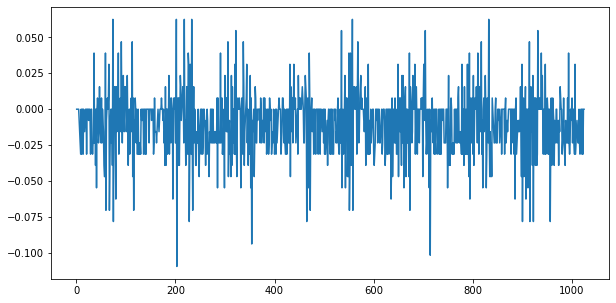

In [28]:
# Signal 시각화
plt.figure(figsize=(10, 5))
plt.plot(df_arr.iloc[0])
plt.show()

## 3. PCA

In [13]:
df_1 = pd.DataFrame({
    "mean": df_arr.mean(axis = 1), 
    "std" : df_arr.std(axis = 1),
    "q0" : df_arr.min(axis = 1),
    "q1" : df_arr.quantile(0.25, axis = 1),
    "q2" : df_arr.median(axis = 1),
    "q3" : df_arr.quantile(0.75, axis = 1),
    "q4" : df_arr.max(axis = 1),
    "minmax" : df_arr.max(axis = 1) - df_arr.min(axis = 1)})
df_1

,mean,std,q0,q1,q2,q3,q4,minmax
Date,,,,,,,,
2020-11-07 00:11:11.302000+00:00,-0.010025,0.022234,-0.109375,-0.023438,-0.007812,0.000000,0.062500,0.171875
2020-11-07 00:22:18.460000+00:00,-0.010651,0.021256,-0.093750,-0.023438,-0.007812,0.000000,0.101562,0.195312
2020-11-07 00:33:16.582000+00:00,-0.010963,0.022170,-0.109375,-0.023438,-0.007812,0.000000,0.093750,0.203125
2020-11-07 00:43:39.275000+00:00,-0.010521,0.022580,-0.101562,-0.023438,-0.007812,0.000000,0.085938,0.187500
2020-11-07 00:54:46.791000+00:00,-0.010735,0.023347,-0.117188,-0.023438,-0.007812,0.000000,0.109375,0.226562
...,...,...,...,...,...,...,...,...
2021-11-20 07:07:33.192000+00:00,0.018031,1.009635,-4.516406,-0.398438,-0.037891,0.414062,6.242188,10.758594
2021-11-20 07:20:02.823000+00:00,0.015554,1.085307,-4.920312,-0.414062,0.000000,0.437500,5.140625,10.060937
2021-11-20 07:32:31.890000+00:00,0.017804,1.140123,-4.663281,-0.460938,0.007812,0.437500,5.617969,10.281250


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
df_scale = scale.fit_transform(df_1)

In [16]:
pca = PCA(n_components = 2)
# print("pca 변동성 : ", pca.explained_variance_ratio_)

In [17]:
pca_score = pca.fit_transform(df_scale)
pca_score

array([[-2.5651139 , -0.29457297],
       [-2.57102022, -0.26947427],
       [-2.57310291, -0.25664215],
       ...,
       [ 5.33479495,  0.86163026],
       [ 3.89590434,  1.49894498],
       [ 4.59690506,  1.62648073]])

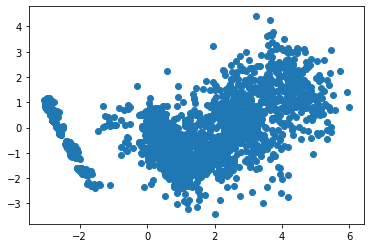

In [18]:
plt.scatter(pca_score[:,0], pca_score[:,1])

### +

In [22]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

df_hat = pca.inverse_transform(pca_score) # 변환된 근사행렬을 pca영향력을 포함한 원본과 비슷한 행렬로 복귀
diff = pd.DataFrame(np.square(df_scale - df_hat)) # 스케일 값에서 복귀값을 뺀 정보
anomaly_score1 = diff.sum(axis=1)
anomaly_score1

0       0.266288
1       0.267263
2       0.267286
3       0.265767
4       0.274899
          ...   
3325    3.592795
3326    0.391397
3327    0.590831
3328    0.116110
3329    2.403506
Length: 3330, dtype: float64

In [23]:
robust_cov = MinCovDet().fit(pca_score) # 최소 공분산 결정기
anomaly_score2 = robust_cov.mahalanobis(pca_score) # 분포형태를 고려한 이상치까지의 거리
anomaly_score2

array([ 3.05540941,  2.91140716,  2.83653919, ..., 68.93612644,
       67.04328045, 83.28008625])

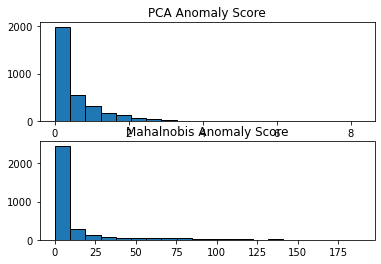

In [24]:
fig,ax=plt.subplots(2,1)

ax[0].hist(anomaly_score1, edgecolor = "black", bins = 20)
ax[0].set_title('PCA Anomaly Score')

ax[1].hist(anomaly_score2, edgecolor = "black", bins = 20)
ax[1].set_title('Mahalnobis Anomaly Score')

plt.show()

In [31]:
detection = pd.DataFrame({"Detection": 
                    np.where((anomaly_score1 > 4) | (anomaly_score2 > 50), 
                    "Anomaly", "Normal")})

pca_anomaly = pd.concat([pd.DataFrame(pca_score, columns=['PC1','PC2']), detection], axis = 1)
groups = pca_anomaly.groupby('Detection')
pca_anomaly

,PC1,PC2,Detection
0,-2.565114,-0.294573,Normal
1,-2.571020,-0.269474,Normal
2,-2.573103,-0.256642,Normal
3,-2.569351,-0.274846,Normal
4,-2.558639,-0.256872,Normal
...,...,...,...
3325,4.430268,3.146538,Normal
3326,4.913262,1.252811,Normal
3327,5.334795,0.861630,Normal
3328,3.895904,1.498945,Normal


In [26]:
pca_anomaly['Detection'].value_counts()

Normal     3131
Anomaly     199
Name: Detection, dtype: int64

In [32]:
pca_anomaly['Detection'].value_counts()

Normal     3323
Anomaly       7
Name: Detection, dtype: int64

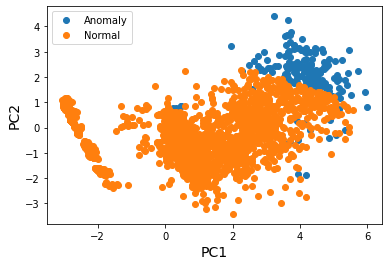

In [27]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PC1'],
            group['PC2'], 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=10, loc='upper left')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

plt.show()